# 모델2: 심화심사모델(Neural Net)

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 우분투 한글깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

# 윈도우 한글깨짐 현상 해결
matplotlib.rc("font", family = "Malgun Gothic")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# 1.데이터 불러오기 및 전처리

In [2]:
df_raw = pd.read_excel('model2_dataset_adj.xlsx')
df_raw.head()

,customer_id,gender,age,bmi,waist,bp_min,bp_max,bt_chol,bt_gluc,bt_rgpt,bt_sgot,bt_sgpt,insu_risk_expense,risk
0,C117780,M,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,-1674994.0,1
1,C121178,M,30,24.816327,86.0,80,125,210.0,96.0,134.0,16.0,27.0,-913949.0,1
2,C116605,M,50,26.259585,88.0,80,130,223.0,114.0,196.0,26.0,23.0,-1813374.0,1
3,C129391,F,35,19.227688,72.0,80,120,157.0,84.0,10.0,11.0,8.0,-4495124.0,1
4,C124954,F,55,21.457268,73.0,80,120,253.0,83.0,NaN,NaN,19.0,456676.0,0


In [3]:
df_raw.isnull().sum()

customer_id             0
gender                  0
age                     0
bmi                     0
waist                   0
bp_min                  0
bp_max                  0
bt_chol               899
bt_gluc               899
bt_rgpt              2465
bt_sgot              2375
bt_sgpt               899
insu_risk_expense       0
risk                    0
dtype: int64

In [4]:
df_raw = pd.get_dummies(df_raw.drop('customer_id', axis=1))

In [5]:
df_raw.dropna(inplace=True)

In [6]:
df_raw_y = df_raw["risk"]
df_raw_x = df_raw.drop(['insu_risk_expense', 'risk'], axis = 1, inplace = False)

In [7]:
df_train_x, df_test_x,df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data size : {}".format(df_train_x.shape))
print("test data size : {}".format(df_test_x.shape))
print("train data size : {}".format(df_train_y.shape))
print("test data size : {}".format(df_test_y.shape))

train data size : (1130, 12)
test data size : (485, 12)
train data size : (1130,)
test data size : (485,)


In [8]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled_x = scaler.fit_transform(df_raw_x)
df_scaled_x = pd.DataFrame(df_scaled_x, columns = v_feature_name)
df_scaled_x.head()

,age,bmi,waist,bp_min,bp_max,bt_chol,bt_gluc,bt_rgpt,bt_sgot,bt_sgpt,gender_F,gender_M
0,0.409396,0.070526,0.199860,1.182299,1.163673,1.568218,-0.193765,0.018453,-0.589492,-0.436175,-0.601432,0.601432
1,-1.586603,0.415485,0.585655,0.300435,0.585879,0.352647,0.482272,2.632173,-0.783448,0.024082,-0.601432,0.601432
2,0.409396,0.983275,0.842852,0.300435,1.163673,0.728895,1.834344,4.393593,0.186329,-0.206047,-0.601432,0.601432
3,-1.087603,-1.783135,-1.214724,0.300435,0.008086,-1.181289,-0.419110,-0.890667,-1.268337,-1.069027,1.662699,-1.662699
4,0.409396,0.787907,0.585655,-0.581430,-0.569708,-0.168313,-0.569340,1.893513,-0.201582,-0.321111,-0.601432,0.601432


In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scaled_x, df_raw_y, test_size=0.3, random_state=1234)

print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(1130, 12)
train data Y size :(1130,)
test data X size :(485, 12)
test data Y size :(485,)


In [10]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(nn_scaled.score(df_train_x,df_train_y)))
print("Accuracy on test set : {:.3f}".format(nn_scaled.score(df_test_x,df_test_y)))

Accuracy on training set : 0.713
Accuracy on test set : 0.520


C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


스케일링 후 모델 성능이 향상되었다.

In [11]:
nn_scaled

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## 2. MLPClassifier 모델 파라미터 변경

## -은닉층 변경

In [14]:
train_accuracy = []; test_accuracy = [];

para_hidden = [10* hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)  
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

,HiddenLayer,TrainAccuracy,TestAccuracy
0,10,0.596,0.507
1,20,0.627,0.563
2,30,0.649,0.530
3,40,0.670,0.530
4,50,0.649,0.553
5,60,0.687,0.528
6,70,0.680,0.522
7,80,0.690,0.522
8,90,0.699,0.528
9,100,0.713,0.520


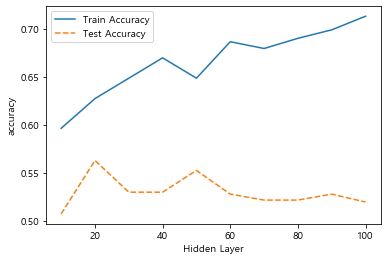

In [15]:
#그래프로 확인
plt.plot(para_hidden, train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_hidden, test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

hidden_layer_sizes = 20

## -활성함수 변경

In [20]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경
para_function = ['logistic','tanh','relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.533,0.540
1,tanh,0.628,0.536
2,relu,0.713,0.520


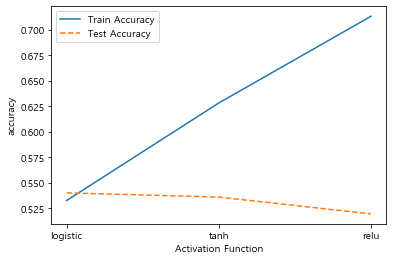

In [21]:
# Activation Function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Activation Function")
plt.legend()

In [22]:
# Activation Function 지정(임의)
activation = 'logistic'

## - 가중치 최적화 변경

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경
para_solver = ['lbfgs','sgd','adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver=v_solver,activation = activation, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

# Solver별 정확도 테이블
df_accuracy_solver.round(3)

C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.528
1,sgd,0.511,0.478
2,adam,0.533,0.540


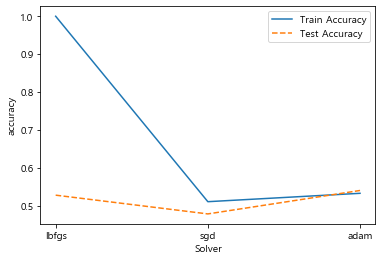

In [24]:
# 정확도 그래프로 확인
plt.plot(para_solver, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Solver")
plt.legend()

In [25]:
# Solver 지정(임의)
solver = 'adam'

## - Mini Batch 변경

In [32]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경
para_batch = [5*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver=solver, activation = activation, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,5,0.556,0.544
1,10,0.536,0.551
2,15,0.547,0.536
3,20,0.542,0.542
4,25,0.540,0.538
5,30,0.542,0.548
6,35,0.550,0.551
7,40,0.552,0.544
8,45,0.542,0.532


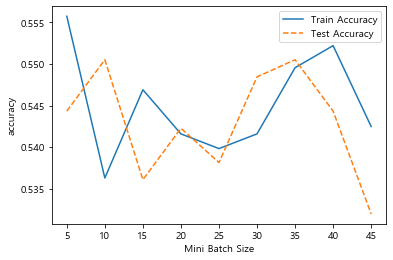

In [33]:
# 정확도 그래프로 확인
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle="--", label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("Mini Batch Size")
plt.legend()

batch_size=35

# 3. 결론 도출

In [37]:
# 최종모델
nn_final = MLPClassifier(activation = 'logistic', solver = 'adam',
                         batch_size = 35, random_state=1234)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)

# train 데이터 셋 정확도
print('Accuracy on training set: 0.713 >>> {:.3f}'.format(nn_final.score(df_train_x,df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set: 0.520 >>> {:.3f}'.format(nn_final.score(df_test_x,df_test_y)))
# Confusion matrix
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set: 0.713 >>> 0.550
Accuracy on test set: 0.520 >>> 0.551
Confusion matrix:
[[144 105]
 [113 123]]


# 4. 예측

In [38]:
pre_review = pd.read_excel('insu_pre_review_processing.xlsx')
pre_review.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,bmi_waist_judge,age_judge,model1_judge_score,model2_judge_score
0,C112346,혈액검사,재검,2014-10-09,1,70,165,60,92.0,88.0,...,0.0,1.0,0.0,0.0,0.0,23.140496,0,1,2,3.0
1,C112350,일반검진,재검,2014-11-18,1,65,175,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,23.671254,1,1,3,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,165,65,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,24.158818,0,1,1,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,60,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,23.507805,1,1,2,2.0
4,C112358,혈액검사,거절,2015-02-24,1,70,165,70,100.0,91.0,...,0.0,0.0,0.0,1.0,0.0,26.491508,1,1,3,4.0


In [39]:
pre_review['gender'] = pre_review['gender'].map({1:'M', 2:'F'})
pre_review.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,bmi_waist_judge,age_judge,model1_judge_score,model2_judge_score
0,C112346,혈액검사,재검,2014-10-09,M,70,165,60,92.0,88.0,...,0.0,1.0,0.0,0.0,0.0,23.140496,0,1,2,3.0
1,C112350,일반검진,재검,2014-11-18,M,65,175,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,23.671254,1,1,3,NaN
2,C112355,일반검진,재검,2015-03-18,M,70,165,65,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,24.158818,0,1,1,NaN
3,C112356,혈액검사,재검,2015-09-28,M,70,165,60,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,23.507805,1,1,2,2.0
4,C112358,혈액검사,거절,2015-02-24,M,70,165,70,100.0,91.0,...,0.0,0.0,0.0,1.0,0.0,26.491508,1,1,3,4.0


In [40]:
df_test_x = pre_review[['gender', 'age', 'bmi', 'waist', 'bp_min', 'bp_max', 'bt_chol', 'bt_gluc', 'bt_rgpt', 'bt_sgot', 'bt_sgpt']]
df_test_x.dropna(inplace=True)
df_test_x = pd.get_dummies(df_test_x)
df_test_x

C:\Users\PIAI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,bmi,waist,bp_min,bp_max,bt_chol,bt_gluc,bt_rgpt,bt_sgot,bt_sgpt,gender_F,gender_M
0,70,23.140496,88.0,80,130,140.0,81.0,98.0,23.0,20.0,0,1
3,70,23.507805,92.0,80,120,167.0,87.0,86.0,28.0,32.0,0,1
4,70,26.491508,91.0,85,130,205.0,83.0,35.0,40.0,53.0,0,1
5,70,24.508946,90.0,80,125,223.0,72.0,45.0,23.0,30.0,0,1
6,65,24.910767,87.0,80,135,207.0,89.0,44.0,25.0,30.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14909,60,23.108435,86.0,80,120,193.0,95.0,21.0,19.0,19.0,0,1
14910,60,21.107266,82.0,80,120,161.0,93.0,17.0,11.0,16.0,0,1
14916,50,20.568807,72.0,70,110,262.0,91.0,18.0,21.0,19.0,1,0
14922,25,17.941817,61.0,70,110,174.0,78.0,12.0,16.0,17.0,1,0


In [41]:
y_pred = nn_final.predict(df_test_x)

In [42]:
df_test = df_test_x
df_test['risk'] = y_pred

In [43]:
df_test.head()

,age,bmi,waist,bp_min,bp_max,bt_chol,bt_gluc,bt_rgpt,bt_sgot,bt_sgpt,gender_F,gender_M,risk
0,70,23.140496,88.0,80,130,140.0,81.0,98.0,23.0,20.0,0,1,1
3,70,23.507805,92.0,80,120,167.0,87.0,86.0,28.0,32.0,0,1,1
4,70,26.491508,91.0,85,130,205.0,83.0,35.0,40.0,53.0,0,1,1
5,70,24.508946,90.0,80,125,223.0,72.0,45.0,23.0,30.0,0,1,1
6,65,24.910767,87.0,80,135,207.0,89.0,44.0,25.0,30.0,0,1,1


In [44]:
df_test['risk'].value_counts()

1    6057
0     944
Name: risk, dtype: int64

In [45]:
df_test['risk'].value_counts(normalize=True).round(3)

1    0.865
0    0.135
Name: risk, dtype: float64